In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob, time
import pickle
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Load Images

In [2]:
# Read in vehicles and non-vehicles
cars = []
notcars = []

for image in glob.glob('data/non-vehicles/**/*.png',recursive=True):
    notcars.append(image)
    
for image in glob.glob('data/vehicles/**/*.png',recursive=True):
    cars.append(image)
    
print(len(cars), len(notcars))

8792 8968


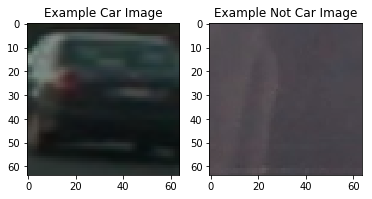

In [3]:
ind_car = np.random.randint(0, len(cars))
ind_nocar = np.random.randint(0, len(notcars))
image_car = mpimg.imread(cars[ind_car])
image_nocar = mpimg.imread(notcars[ind_nocar])

fig = plt.figure()
plt.subplot(121)
plt.imshow(image_car, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(image_nocar, cmap='gray')
plt.title('Example Not Car Image')

## 2. Extract Hog

In [4]:
from utils import get_hog_features

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


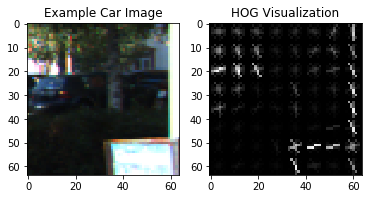

In [5]:
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [6]:
vec = get_hog_features(image[:,:,2], orient, 
                       pix_per_cell, cell_per_block, 
                       vis=False, feature_vec=True)

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [7]:
color_reps = {'HSV':cv2.COLOR_BGR2HSV, 
              'LUV': cv2.COLOR_BGR2LUV, 'HLS':cv2.COLOR_BGR2HLS, 
              'YUV': cv2.COLOR_BGR2YUV, 'YCrCb': cv2.COLOR_BGR2YCrCb}

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


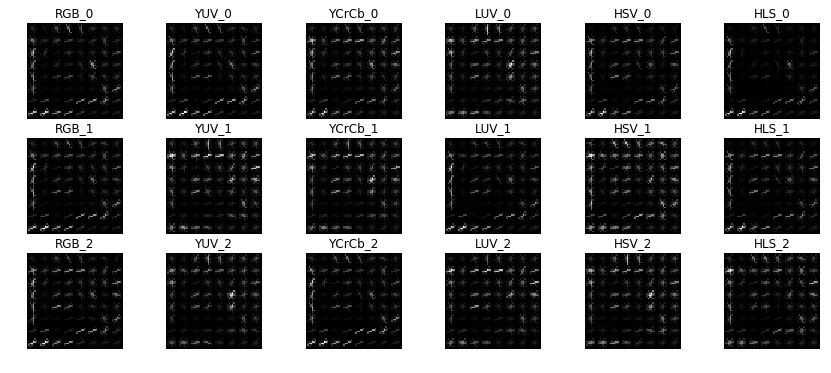

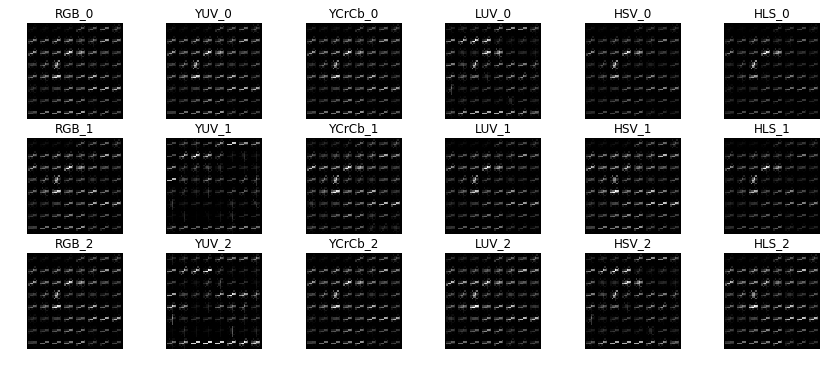

In [8]:
ind_car = np.random.randint(0, len(cars))
ind_nocar = np.random.randint(0, len(notcars))
image_car = mpimg.imread(cars[ind_car])
image_nocar = mpimg.imread(notcars[ind_nocar])
orient = 9
pix_per_cell = 8
cell_per_block = 2

def draw_hog_channels(image):
    fig, axs = plt.subplots(3,6, figsize=(15, 6))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(3):
        features, hog_image = get_hog_features(image[:,:,i], orient, 
                              pix_per_cell, cell_per_block, 
                              vis=True, feature_vec=False)
        axs[i*6].axis('off')
        axs[i*6].imshow(hog_image, cmap='gray')
        axs[i*6].set_title('RGB_'+str(i))

    color_space_cnt = 1
    for color_space in color_reps:
        image = cv2.cvtColor(image, color_reps[color_space])
        for i in range(3):
            features, hog_image = get_hog_features(image[:,:,i], orient, 
                                  pix_per_cell, cell_per_block, 
                                  vis=True, feature_vec=False)
            axs[i*6+color_space_cnt].axis('off')
            axs[i*6+color_space_cnt].imshow(hog_image, cmap='gray')
            axs[i*6+color_space_cnt].set_title(color_space+'_'+str(i))
        color_space_cnt += 1
draw_hog_channels(image_car)
draw_hog_channels(image_nocar)

### Explore hog parameters

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
ind_car = np.random.randint(0, len(cars))
ind_nocar = np.random.randint(0, len(notcars))
images = [mpimg.imread(cars[ind_car]),mpimg.imread(notcars[ind_nocar])]

def explore_hog(orient, pix_per_cell, cell_per_block):
    for image in images:
        fig = plt.figure()
        image = cv2.cvtColor(image, color_reps['HSV'])
        for i in range(3):
            features, hog_image = get_hog_features(image[:,:,i], orient, 
                                  pix_per_cell, cell_per_block, 
                                  vis=True, feature_vec=True)

            plt.subplot(131+i)
            plt.imshow(hog_image, cmap='gray')
        fig.tight_layout()
    return len(features)

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


1568

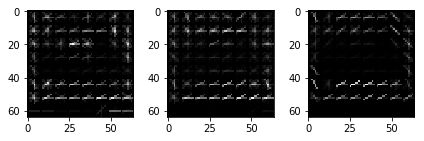

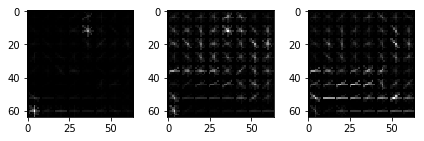

In [10]:
interactive_plot = interactive(explore_hog, orient=8, pix_per_cell=8, cell_per_block=2)
output = interactive_plot.children[-1]
interactive_plot

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


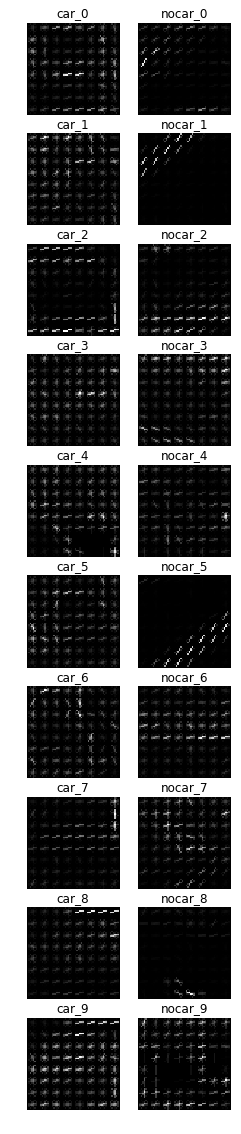

In [11]:
n_smaples = 10
fig, axs = plt.subplots(10,2, figsize=(4, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(n_smaples):
    ind_car = np.random.randint(0, len(cars))
    ind_nocar = np.random.randint(0, len(notcars))
    images = [mpimg.imread(cars[ind_car]),mpimg.imread(notcars[ind_nocar])]
    for j, img in enumerate(images):
        image = cv2.cvtColor(img, color_reps['HLS'])
        features, hog_image = get_hog_features(image[:,:,2], orient, 
                              pix_per_cell, cell_per_block, 
                              vis=True, feature_vec=False)
        axs[i*2+j].axis('off')
        axs[i*2+j].imshow(hog_image, cmap='gray')
        axs[i*2+j].set_title(('car_' if j==0 else 'nocar_')+str(i))

In [12]:
def extract_img_features(img, channel='All', 
                         hog_feat=True, orient=9, pix_per_cell=9, cell_per_block=9, 
                         spatial_feat=True, spatial_size=(16,16), 
                         hist_feat=True, hist_bins=32):
    
    hog_features = np.array([])
    if hog_feat:
        if channel=='All':
            hog_feat1 = get_hog_features(img[:,:,0], orient, pix_per_cell, cell_per_block,
                                    vis=False, feature_vec=True)
            hog_feat2 = get_hog_features(img[:,:,1], orient, pix_per_cell, cell_per_block,
                                    vis=False, feature_vec=True)
            hog_feat3 = get_hog_features(img[:,:,2], orient, pix_per_cell, cell_per_block,
                                    vis=False, feature_vec=True)
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
        else:
            hog_features = get_hog_features(img[:,:,channel], orient, 
                                       pix_per_cell, cell_per_block, 
                                       vis=False, feature_vec=True)
            
    hist_features = np.array([])        
    if hist_feat:
        ch1 = np.histogram(img[:,:,0], bins=hist_bins, range=(0, 256))[0]
        ch2 = np.histogram(img[:,:,1], bins=hist_bins, range=(0, 256))[0]
        ch3 = np.histogram(img[:,:,2], bins=hist_bins, range=(0, 256))[0]
        hist_features = np.hstack((ch1, ch2, ch3))
        
    spatial_features = np.array([]) 
    if spatial_feat:
        spatial_features = cv2.resize(img, spatial_size).ravel()
        
    return np.hstack((hog_features, hist_features, spatial_features))

def extract_features(imgs, color_space='BGR', channel='All', 
                     hog_feat=True, orient=9, pix_per_cell=9, cell_per_block=3, 
                     spatial_feat=True, spatial_size=(16,16), 
                     hist_feat=True, hist_bins=32):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for img_file in imgs:
        file_features = []
        image = cv2.imread(img_file) # Read in each imageone by one
        # apply color conversion if other than 'RGB'
        if color_space in color_reps:
            image = cv2.cvtColor(image, color_reps[color_space])
        feature = extract_img_features(image, channel=channel, hog_feat=hog_feat,
                                       orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                       spatial_feat=spatial_feat, spatial_size=spatial_size, 
                                       hist_feat=hist_feat, hist_bins=hist_bins)
            
        features.append(feature)
    return features

In [13]:
car_features = extract_features(cars,color_space='HSV', channel='All', 
                                hog_feat=True, orient=9, pix_per_cell=9, cell_per_block=3)
notcar_features = extract_features(notcars,color_space='HSV', channel='All',
                                  hog_feat=True, orient=9, pix_per_cell=9, cell_per_block=3)
X = np.array(car_features+notcar_features, dtype=np.float64) 
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features)))) # Define the labels vector
pickle.dump(X, open('features_HSV_all_993.pkl','wb'))
pickle.dump(y, open('labels.pkl', 'wb'))

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [14]:
X_scaler = StandardScaler().fit(X)
normalized_X = X_scaler.transform(X) # normalize and recenter

# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=22)
svc = LinearSVC(loss='hinge') # Use a linear SVC 
t=time.time() # Time the training process
svc.fit(X_train, y_train) # Train the classifier
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

11.24 Seconds to train SVC...
Test Accuracy of SVC =  0.9882


In [15]:
# pickle.dump(svc, open( "features_HSV_all_features.p", "wb" ) )
# clf2=pickle.load(open("features_HSV_all_features.p","rb"))
# clf2.score(X_test, y_test)

In [16]:
color_spaces = ['BGR']+list(color_reps.keys())
for color_space in color_spaces:
    for c in range(3):
        car_features = extract_features(cars,color_space=color_space, channel=c, 
                                        hog_feat=True, spatial_feat=False, hist_feat=False)
        notcar_features = extract_features(notcars,color_space=color_space, channel=c,
                                           hog_feat=True, spatial_feat=False, hist_feat=False)
        X = np.array(car_features+notcar_features, dtype=np.float64) 
        pickle.dump(X, open('hog_features_'+color_space+'_'+str(c)+'.pkl', 'wb' ))

        car_features = extract_features(cars,color_space=color_space, channel=c, 
                                        hog_feat=False, spatial_feat=True, hist_feat=False)
        notcar_features = extract_features(notcars,color_space=color_space, channel=c,
                                           hog_feat=False, spatial_feat=True, hist_feat=False)
        X = np.array(car_features+notcar_features, dtype=np.float64) 
        pickle.dump(X, open('spatial_features_'+color_space+'_'+str(c)+'.pkl', 'wb' ))
        
        car_features = extract_features(cars,color_space=color_space, channel=c, 
                                        hog_feat=False, spatial_feat=False, hist_feat=True)
        notcar_features = extract_features(notcars,color_space=color_space, channel=c,
                                           hog_feat=False, spatial_feat=False, hist_feat=True)
        X = np.array(car_features+notcar_features, dtype=np.float64) 
        pickle.dump(X, open('hist_features_'+color_space+'_'+str(c)+'.pkl', 'wb' ))
#         y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features)))) # Define the labels vector
#         pickle.dump(y, open('labels.pkl', 'wb'))

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Model Parameter Comparison

In [18]:
y = pickle.load(open('labels.pkl', 'rb'))
for color_space in color_spaces:
    for c in range(3):
        file_name = 'hog_features_'+color_space+'_'+str(c)
        print('using:', file_name)
        X = pickle.load(open(file_name+'.pkl', 'rb' ))
        X_scaler = StandardScaler().fit(X)
        normalized_X = X_scaler.transform(X) # normalize and recenter

        # Split up data into randomized training and test sets
        X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=22)
        svc = LinearSVC(loss='hinge') # Use a linear SVC 
        t=time.time() # Time the training process
        svc.fit(X_train, y_train) # Train the classifier
        t2 = time.time()
        print(round(t2-t, 2), 'Seconds to train SVC...')
        print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

In [19]:
cc_settings = [
#                (('BGR',0), ('BGR',1), ('BGR',2)),
#                (('YUV',0), ('BGR',1), ('HSV',2)),
#                (('YCrCb',0), ('BGR',1), ('HSV',2)),
                 (('HSV', 0), ('HSV', 1), ('HSV', 2)),
#                (('YUV',0), ('BGR',1), ('HSV',2)),
#                (('YCrCb',0), ('BGR',1), ('HSV',2)),    
              ]
for space_channels in cc_settings:
    X_list = []
    print('using:', space_channels)
    for color_space, c in space_channels:
        file_name = 'hog_features_'+color_space+'_'+str(c)
        X_list.append(pickle.load(open(file_name+'.pkl', 'rb' )))
    X = np.hstack(X_list)
    X_scaler = StandardScaler().fit(X)
    normalized_X = X_scaler.transform(X) # normalize and recenter

    # Split up data into randomized training and test sets
    X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=22)
    svc = LinearSVC(loss='hinge') # Use a linear SVC 
    t=time.time() # Time the training process
    svc.fit(X_train, y_train) # Train the classifier
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

## Model Training

In [20]:
car_features = extract_features(cars,color_space='HSV', channel='All', spatial_feat=True, hist_feat= True)
notcar_features = extract_features(notcars,color_space='HSV', channel='All', spatial_feat=True, hist_feat= True)
X = np.array(car_features+notcar_features, dtype=np.float64) 
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features)))) # Define the labels vector

/Users/dxw060/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [21]:
X_scaler = StandardScaler().fit(X)
normalized_X = X_scaler.transform(X) # normalize and recenter

# Split up data into randomized training and test sets
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=22)
svc = LinearSVC(loss='hinge') # Use a linear SVC 
t=time.time() # Time the training process
svc.fit(X_train, y_train) # Train the classifier
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

6.95 Seconds to train SVC...
Test Accuracy of SVC =  0.9882


In [23]:
model_dict = {
    "svc": svc,
    "scaler": X_scaler,
    "orient": 9,
    "pix_per_cell": 8,
    "cell_per_block": 2,
    "spatial_size": (16,16),
    "hist_bins": 32
}
pickle.dump(model_dict, open( "model_HSV_all_features.pkl", "wb" ) )